In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from matplotlib.legend_handler import HandlerLine2D
import warnings
warnings.filterwarnings('ignore')

X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X, Y)

In [2]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000]
XtS, params = ml.rescale(Xt)
XvS, _ = ml.rescale(Xva, params)

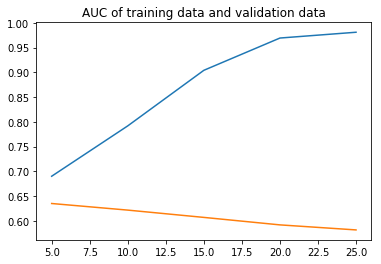

In [3]:
# vary maxDept
# set minParent = 2, minLeaf = 1

aucs_t = []
aucs_v = []
learner = ml.knn.knnClassify()
depths = [5,10,15,20,25]
for i, d in enumerate(depths):
    learner = ml.dtree.treeClassify(Xt, Yt, minParent=2, minLeaf=1, maxDepth=d)
    auc_t = learner.auc(Xt, Yt)
    aucs_t.insert(i, auc_t);
    auc_v = learner.auc(Xva, Yva)
    aucs_v.insert(i, auc_v)
    
plt.title('AUC of training data and validation data')
plt.plot(depths, aucs_t)
plt.plot(depths, aucs_v)
plt.show()

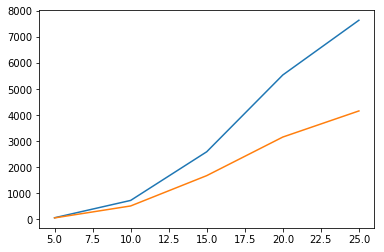

In [5]:
# increase minParent and minLeaf

nodes = []
nodes2 = []
learner = ml.knn.knnClassify()
depths = [5,10,15,20,25]
for i, d in enumerate(depths):
    learner = ml.dtree.treeClassify(Xt, Yt, minParent=2, minLeaf=1, maxDepth=d)
    learner.auc(Xva, Yva)
    nodes.insert(i, learner.sz);
    
    learner = ml.dtree.treeClassify(Xt, Yt, minParent=5, minLeaf=1, maxDepth=d)
    learner.auc(Xva, Yva)
    nodes2.insert(i, learner.sz);
    
plt.plot(depths, nodes)
plt.plot(depths, nodes2)
plt.show()

In [6]:
# vary minParent and minLeaf

P = [2,4,6,8,10]
L = [1,2,5,7,9]
tr_auc = np.zeros((len(P),len(L))) 
va_auc = np.zeros((len(P),len(L)))
for i,p in enumerate(P): 
    for j,l in enumerate(L):
        learner = ml.dtree.treeClassify(Xt, Yt, minParent=p, minLeaf=l, maxDepth=15)
        tr_auc[i][j] = learner.auc(Xt, Yt)
        va_auc[i][j] = learner.auc(Xva, Yva)

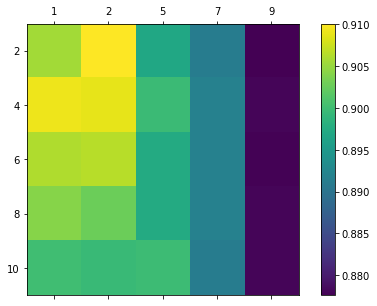

In [7]:
# training data

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(['']+L) 
ax.set_yticklabels(['']+P)
plt.show()

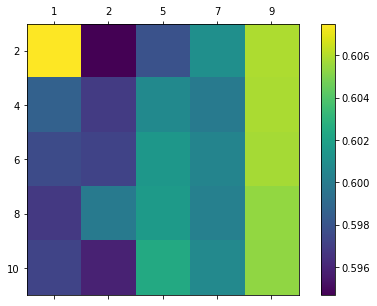

In [8]:
# validation data

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(['']+L) 
ax.set_yticklabels(['']+P)
plt.show()